1. train.csv : 학습 데이터
id : 샘플 아이디
Age : 나이
TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
Occupation : 직업
Gender : 성별
NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
ProductPitched : 영업 사원이 제시한 상품
PreferredPropertyStar : 선호 호텔 숙박업소 등급
MaritalStatus : 결혼여부
NumberOfTrips : 평균 연간 여행 횟수
Passport : 여권 보유 여부 (0: 없음, 1: 있음)
PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
Designation : (직업의) 직급
MonthlyIncome : 월 급여
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)




2. test.csv : 테스트 데이터

id : 샘플 아이디
Age : 나이
TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
Occupation : 직업
Gender : 성별
NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
ProductPitched : 영업 사원이 제시한 상품
PreferredPropertyStar : 선호 호텔 숙박업소 등급
MaritalStatus : 결혼여부
NumberOfTrips : 평균 연간 여행 횟수
Passport : 여권 보유 여부 (0: 없음, 1: 있음)
PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
Designation : (직업의) 직급
MonthlyIncome : 월 급여




3. sample_submission.csv : 제출 양식
id : 샘플 아이디
ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [1]:
# 필요라이브러리 로드
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [2]:
# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

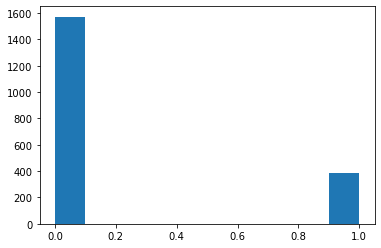

In [5]:
plt.hist(train.ProdTaken)
plt.show()

여행 상품을 신청하지 않은 사람들(0)이 신청한 사람들(1)에 비해 약 3배 가량 많음

# EDA (Exploratory Data Analysis) 탐색적 데이터 분석

In [6]:
# MAC plt 한글 폰트
from matplotlib import rc 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


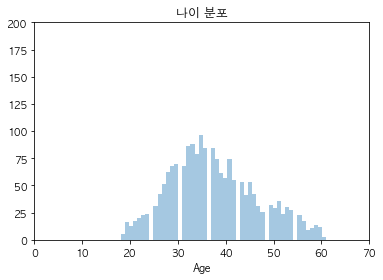

In [7]:
sns.distplot(train['Age'], kde=False, bins=50)
plt.axis([0, 70, 0, 200]) # [x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값]
plt.title("나이 분포")
plt.show()

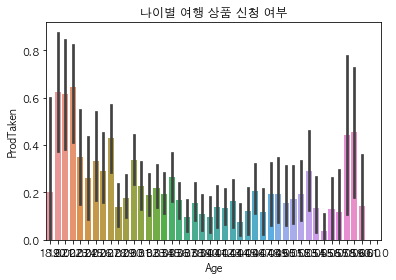

In [8]:
sns.barplot(x='Age', y='ProdTaken', data=train)
plt.title("나이별 여행 상품 신청 여부")
sns.set(rc = {'figure.figsize':(80,8)})
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from c

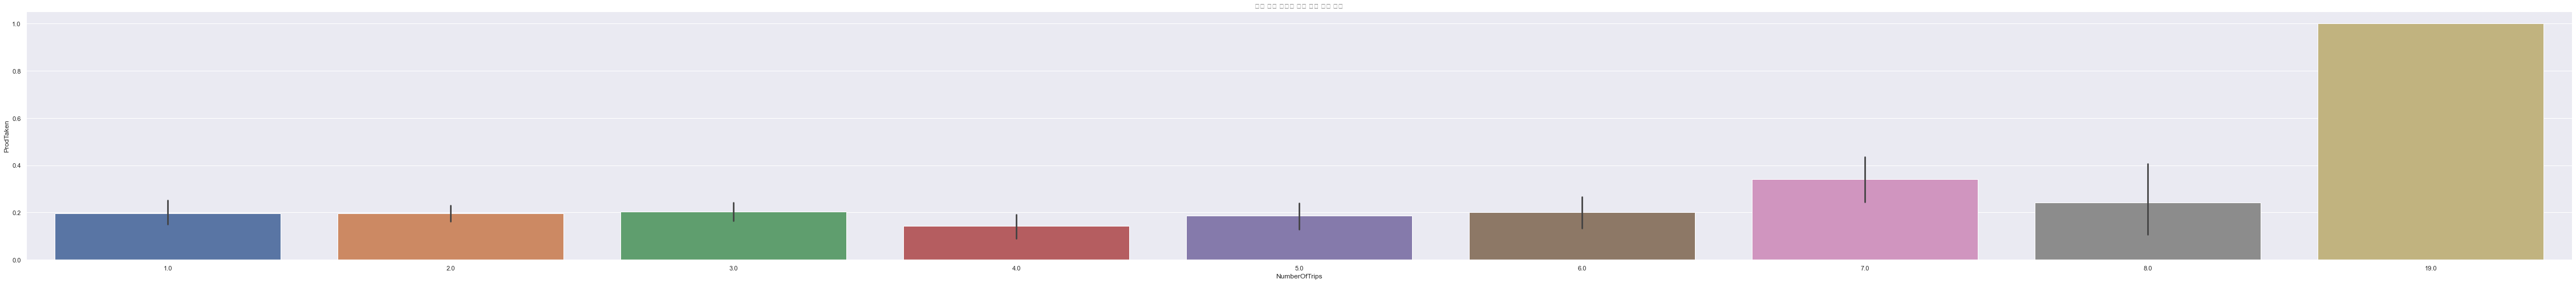

In [9]:
sns.barplot(x='NumberOfTrips', y='ProdTaken', data=train)
plt.title("연간 여행 횟수별 여행 상품 신청 여부")
sns.set(rc = {'figure.figsize':(10,8)})
plt.show()

In [10]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

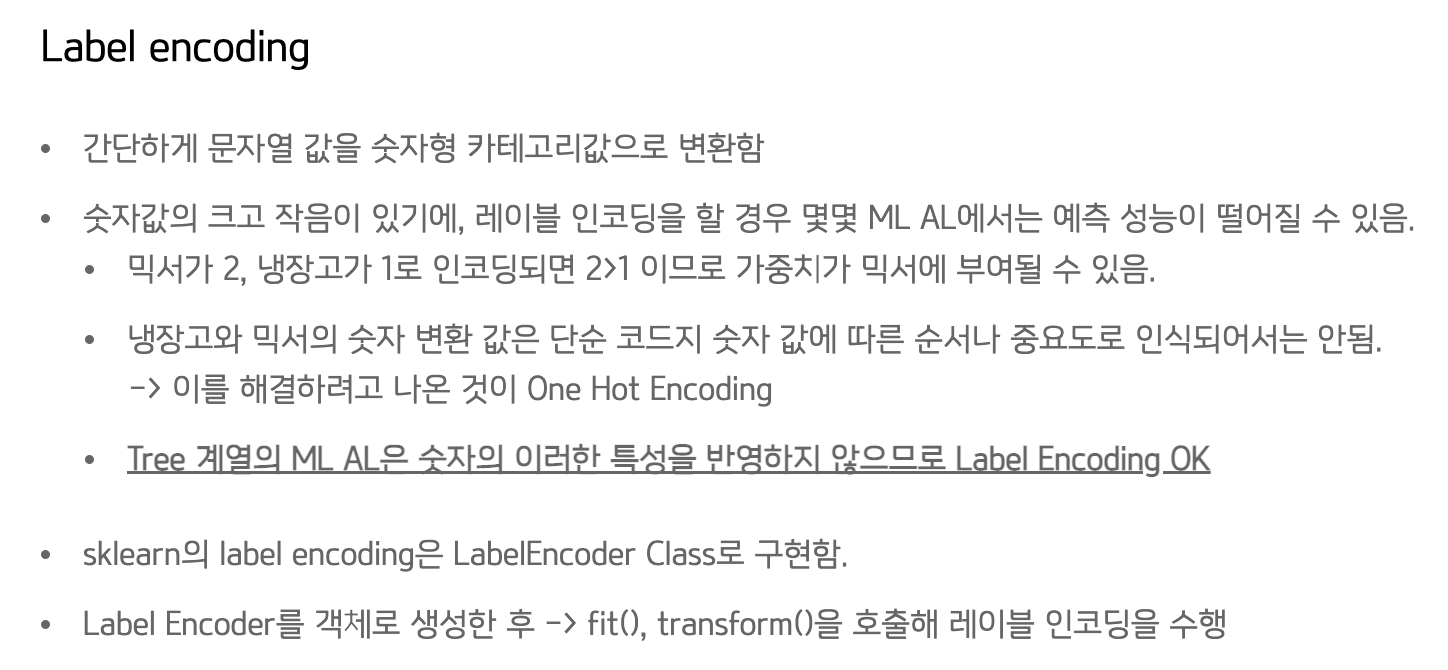

In [11]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data):
    temp = data.copy()
    for col, dtype in temp.dtypes.items():
        if dtype == 'object':
            # 문자형 칼럼의 경우 'Unknown'을 채워줍니다.
            value = 'Unknown'
        elif dtype == int or dtype == float:
            # 수치형 칼럼의 경우 0을 채워줍니다.
            value = 0
        temp.loc[:,col] = temp[col].fillna(value)
    return temp

train_nona = handle_na(train)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
train_nona.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [12]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [13]:
# 문자형 변수(Object)
object_columns = train_nona.columns[train_nona.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 보아서 봅시다
train_nona[object_columns]

object 칼럼은 다음과 같습니다 :  ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,Company Invited,Small Business,Male,Basic,Married,Executive
1,Self Enquiry,Small Business,Female,Deluxe,Single,Manager
2,Company Invited,Salaried,Male,Deluxe,Married,Manager
3,Company Invited,Small Business,Male,Basic,Married,Executive
4,Self Enquiry,Salaried,Male,Deluxe,Divorced,Manager
...,...,...,...,...,...,...
1950,Self Enquiry,Small Business,Male,Basic,Single,Executive
1951,Self Enquiry,Salaried,Female,Super Deluxe,Divorced,AVP
1952,Company Invited,Small Business,Female,Basic,Divorced,Executive
1953,Self Enquiry,Small Business,Female,Deluxe,Married,Manager


In [14]:
# LabelEncoder를 준비해줍니다.
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# LabelEcoder는 학습하는 과정을 필요로 합니다.
encoder.fit(train_nona['TypeofContact'])

#학습된 encoder를 사용하여 문자형 변수를 숫자로 변환해줍니다.
encoder.transform(train_nona['TypeofContact'])

array([0, 1, 0, ..., 0, 1, 0])

In [15]:
train_enc = train_nona.copy()

# 모든 문자형 변수에 대해 encoder를 적용합니다.
for o_col in object_columns:
    encoder = LabelEncoder()
    encoder.fit(train_enc[o_col])
    train_enc[o_col] = encoder.transform(train_enc[o_col])

# 결과를 확인합니다.
train_enc

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,2,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,0.0,3,1,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,0.0,2,2,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,0.0,0
3,4,29.0,0,1,7.0,3,2,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,2,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,2,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,1,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,1,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,1,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [16]:
# 결측치 처리
test = handle_na(test)

# 문자형 변수 전처리
for o_col in object_columns:
    encoder = LabelEncoder()
    
    # test 데이터를 이용해 encoder를 학습하는 것은 Data Leakage 입니다! 조심!
    encoder.fit(train_nona[o_col])
    
    # test 데이터는 오로지 transform 에서만 사용되어야 합니다.
    test[o_col] = encoder.transform(test[o_col])

# 결과를 확인합니다.
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,0.0,3,2,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,2,3,0.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,2,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,2,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,1,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,1,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,2,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,2,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [17]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=500, learning_rate=0.2, max_depth=4, random_state = 32)

In [18]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train_enc.drop(columns=['id'])
test = test.drop(columns=['id'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [19]:
# 모델 학습
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=32,
              reg_alpha=0, reg_lambda=1, ...)

In [20]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[1 0 0 0 1 0 0 1 0 1]


In [21]:
# sample_submission 불러오기
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
2928,2929,0
2929,2930,0
2930,2931,0
2931,2932,0


In [22]:
# 예측된 값을 정답파일과 병합
sample_submission['ProdTaken'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,ProdTaken
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1


In [23]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission.csv',index = False)